## Ensemble Learning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Max Voting & Weighted Average Voting

In [1]:
from sklearn.datasets import make_moons

In [18]:
x, y = make_moons(n_samples=1000,noise=0.2)

In [19]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}


In [20]:
df= pd.DataFrame(df)

In [42]:
df

,x1,x2,y
0,1.495317,-0.186285,1
1,0.614616,0.945072,0
2,-0.138937,1.341047,0
3,0.870211,-0.166698,1
4,0.582659,-0.318984,1
...,...,...,...
995,0.470462,-0.499329,1
996,2.078964,0.408315,1
997,1.115230,0.495037,0
998,-1.249108,-0.057481,0


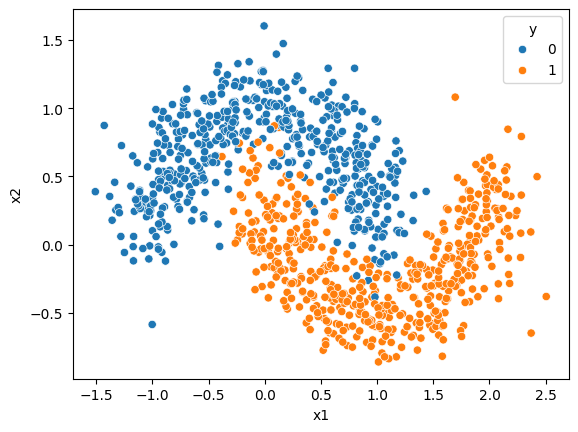

In [22]:
sns.scatterplot(x="x1",y="x2",data= df ,hue="y")
plt.show()

In [39]:
x= df.iloc[:,:-1]
y = df["y"]

In [32]:
from sklearn.model_selection import train_test_split

In [45]:
x_train ,x_test , y_train   , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [47]:
y_train

29     0
535    1
695    1
557    0
836    1
      ..
106    0
270    0
860    0
435    1
102    1
Name: y, Length: 800, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test ,y_test)*100

(100.0, 95.5)

In [53]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_train,y_train)*100 , svm.score(x_test ,y_test)*100

(96.625, 96.0)

In [54]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)*100 , nb.score(x_test ,y_test)*100

(88.375, 84.5)

In [55]:
from sklearn.ensemble import VotingClassifier

In [57]:
li = [("dt1",DecisionTreeClassifier()),("svm",SVC()),("nb",GaussianNB())]

In [58]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svm', SVC()),
                             ('nb', GaussianNB())])

In [60]:
vc.score(x_train,y_train)*100 , vc.score(x_test ,y_test)*100

(97.5, 95.5)

## Bagging Meta Estimator Random Forest

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
bg= BaggingClassifier(estimator=SVC(), n_estimators=25)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=25)

In [64]:
bg.score(x_train,y_train)*100 , bg.score(x_test ,y_test)*100

(96.625, 96.0)

In [67]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [68]:
rf.score(x_train,y_train)*100 , rf.score(x_test ,y_test)*100

(100.0, 96.5)